# Homework 2: Univariate Statistics

In [400]:
MY_UNIQNAME = 'austinam'

In [401]:
collaborated_with = ['iviev', 'dimac', 'shruthis']

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from pandas import Series
from pandas import DataFrame

In [352]:
cwur_data = pd.read_csv("cwurData.csv")
#cwur_data = pd.read_csv("cwurData.csv", sep=r',(?!\s)', engine='python')
cwur_data.head(1)
#cwur_data.describe()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.0,2012


In [354]:
shanghai_data = pd.read_csv("shanghaiData.csv")
shanghai_data.head()
shanghai_data.describe()
shanghai_data['world_rank'] = shanghai_data['world_rank'].str.split('-')
shanghai_data['world_rank'] = shanghai_data['world_rank'].apply(lambda x:x[0])
shanghai_data['national_rank']=shanghai_data['national_rank'].astype(str)
shanghai_data['national_rank'] = shanghai_data['national_rank'].str.split('-')
shanghai_data['national_rank'] = shanghai_data['national_rank'].apply(lambda x:x[0])
shanghai_data['world_rank'] = shanghai_data['world_rank'].astype(str).astype(int)
shanghai_data['national_rank'] = shanghai_data['national_rank'].astype(str).astype(float)
shanghai_data.head(1)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005


In [399]:
times_data = pd.read_csv("timesData.csv")
times_data.head()
times_data['total_score'] = times_data['total_score'].replace('-','NaN')
times_data['total_score'] = times_data['total_score'].astype(str).astype(float)
times_data['num_students'] = times_data['num_students'].str.replace(',', '')
times_data['num_students'] = times_data['num_students'].astype(str).astype(float)
#times_data['international_students'] = times_data['international_students'].str.replace('%', '')
times_data['international'] = times_data['international'].replace('-','NaN')
times_data['international'] = times_data['international'].astype(str).astype(float)
times_data['female_male_ratio'] = times_data['female_male_ratio'].str.split(':')
times_data['female'] = times_data['female_male_ratio'].str[0]
times_data['male'] = times_data['female_male_ratio'].str[1]
times_data['female'] = times_data['female'].replace('-','NaN')
times_data['male'] = times_data['male'].replace('-','NaN')
times_data['new_female_male_ratio'] = times_data['female'].astype(str).astype(float)/times_data['male'].astype(str).astype(float)
times_data['new_female_male_ratio'] = times_data['new_female_male_ratio'].round(2)
#ask why rounding didn't take care of this
times_data['new_female_male_ratio'] = times_data['new_female_male_ratio'].replace([np.inf, -np.inf], np.nan)
times_data.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male,new_female_male_ratio
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25%,NaN,2011,NaN,NaN,NaN


## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [13]:
import seaborn as sns
print(sns.__version__)
from scipy.stats import norm

0.9.0


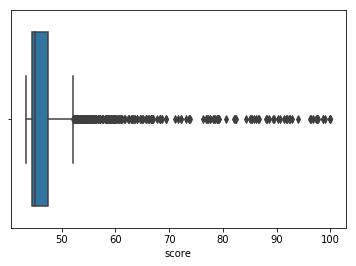

In [356]:
sns.boxplot(x=cwur_data['score']) 

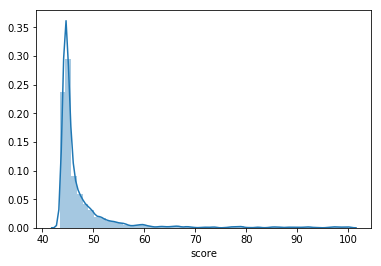

In [357]:
sns.distplot(cwur_data['score'])

In [358]:
cwur_data['score'].describe()

count    2200.000000
mean       47.798395
std         7.760806
min        43.360000
25%        44.460000
50%        45.100000
75%        47.545000
max       100.000000
Name: score, dtype: float64

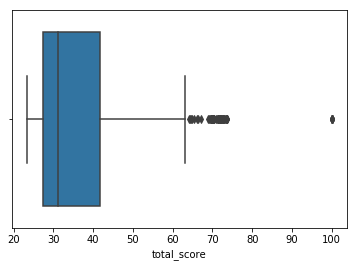

In [359]:
sns.boxplot(x=shanghai_data['total_score']) 

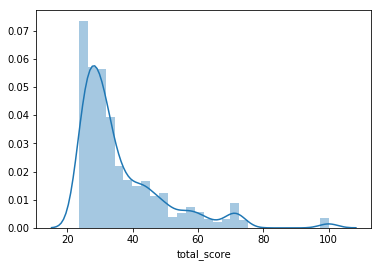

In [360]:
sns.distplot(shanghai_data['total_score'].dropna())

In [361]:
shanghai_data['total_score'].describe()

count    1101.000000
mean       36.383470
std        13.557186
min        23.500000
25%        27.400000
50%        31.300000
75%        41.800000
max       100.000000
Name: total_score, dtype: float64

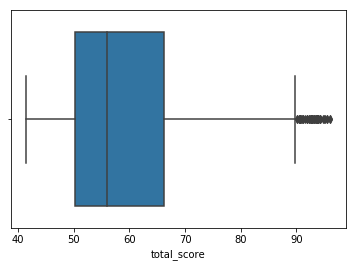

In [362]:
sns.boxplot(x=times_data['total_score']) 

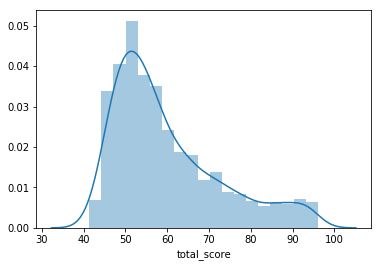

In [363]:
sns.distplot(times_data['total_score'].dropna())

In [364]:
times_data['total_score'].describe()

count    1201.000000
mean       59.846128
std        12.803446
min        41.400000
25%        50.300000
50%        56.000000
75%        66.200000
max        96.100000
Name: total_score, dtype: float64

The mean of the scores for universities in the CWUR dataset is 47.8, the median is 45.1, and the range is 43.4 to 100. The distribution of the scores is significantly skewed to the right, with many of the scores falling in the 40's and many outliers in the higher numbers. 

The mean of the scores for universities from the Shanghai dataset is lower than the other datasets, at 36.4. The median is 31.3. The lowest score is 23.5 and the highest is 100, so the range is wider for this dataset. The distribution of the scores is skewed to the right, with no universities receiving a score between 80 and 99. Many schools scored low in this dataset, with 75% below 41.8.

The mean of the scores for universities from the Times dataset is 59.8, the median is 56.0 and the range is 41.4 to 96.1. The distribution of the scores is skewed to the right, though not as extreme as the CWUR dataset. Most universities scored in the 50's, with outliers in the higher scores.

### For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

In [97]:
import matplotlib.pyplot as plt
from scipy import stats

In [98]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

count       390.000000
mean      23638.576923
std       14834.339363
min         462.000000
25%       12566.500000
50%       21086.500000
75%       30114.250000
max      120986.000000
Name: num_students, dtype: float64


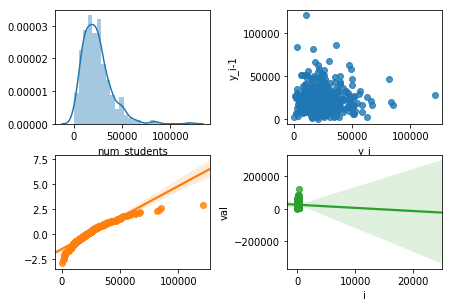

In [365]:
times_2015 = times_data[(times_data.year==2015)]
print(times_2015['num_students'].describe())
multiplePlots(times_2015['num_students'].dropna())

In [366]:
most_students_times = times_2015[(times_2015.num_students== 120986)]
most_students_times

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female,male,new_female_male_ratio
1722,301-350,Sapienza University of Rome,Italy,32.3,37.5,28.1,50.7,34.2,NaN,120986.0,32.3,7%,"[59 , 41]",2015,59,41,1.44


The mean was 23,638.6 students and the median was 21,086.5 students. They are similar, but the mean was higher than the median due to the fact that the distribution is right-skewed based on the histogram, qq plot and run sequence, which has a slight slope with data not falling randomly about the line. There are several outliers that have a very large number of students, which is also affecting the mean. Based on the run sequence the randomness assumption does not hold.  

The school with the most students was Sapienza University of Rome.

### For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

In [113]:
times_2011 = times_data[(times_data.year==2011)]
times_2016 = times_data[(times_data.year==2016)]
times_2011_us = times_2011[(times_2011.country=='United States of America')]
times_2011_int = times_2011[(times_2011.country!='United States of America')]
times_2016_us = times_2016[(times_2016.country=='United States of America')]
times_2016_int = times_2016[(times_2016.country!='United States of America')]

count    72.000000
mean     42.230556
std      18.120478
min      15.900000
25%      26.400000
50%      38.600000
75%      57.000000
max      90.900000
Name: international, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


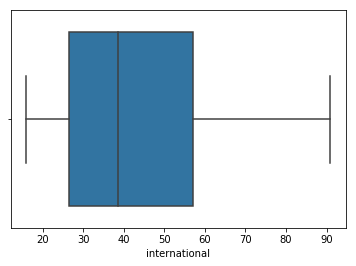

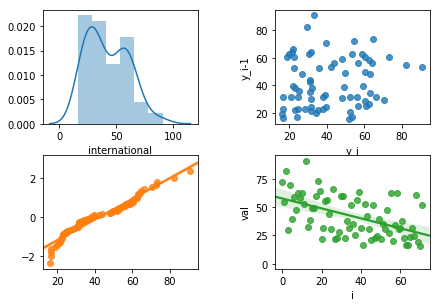

In [367]:
print(times_2011_us['international'].describe())
print(sns.boxplot(x=times_2011_us['international']))
multiplePlots(times_2011_us['international'])

count    119.000000
mean      61.502521
std       24.147086
min       18.400000
25%       43.600000
50%       63.200000
75%       84.750000
max      100.000000
Name: international, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


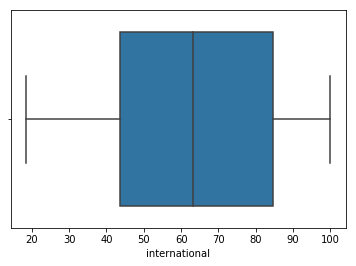

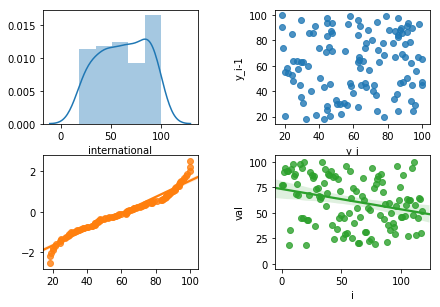

In [368]:
print(times_2011_int['international'].describe())
print(sns.boxplot(x=times_2011_int['international']))
multiplePlots(times_2011_int['international'].dropna())

count    146.000000
mean      42.431507
std       14.407119
min       17.100000
25%       30.625000
50%       40.200000
75%       52.925000
max       84.000000
Name: international, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


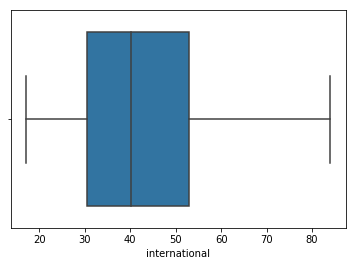

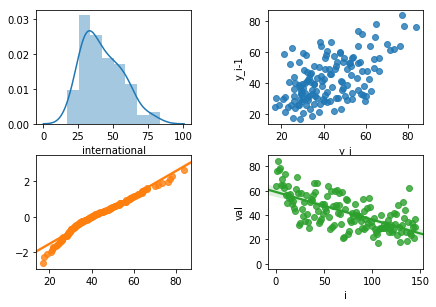

In [369]:
print(times_2016_us['international'].describe())
print(sns.boxplot(x=times_2016_us['international']))
multiplePlots(times_2016_us['international'])

count    654.000000
mean      49.855199
std       25.111324
min        7.100000
25%       27.700000
50%       47.000000
75%       70.900000
max       99.900000
Name: international, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


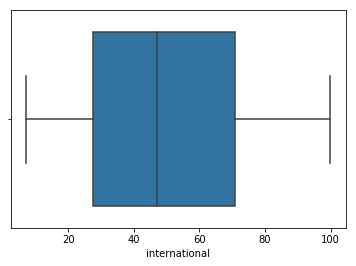

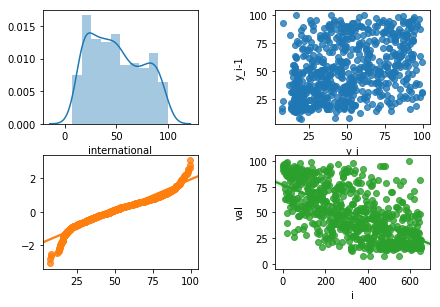

In [370]:
print(times_2016_int['international'].describe())
print(sns.boxplot(x=times_2016_int['international']))
multiplePlots(times_2016_int['international'].dropna())

2011 - For universities in the US, the average international score was 42.2, the median was 38.6, and the range was 15.9 to 90.9. The distribution is bimodal and slightly skewed to the right, with many of the scores falling below 60. A clear slope in the run sequence shows the data is not normally distributed. The randomness assumption holds due to the fact that there is no clear pattern in the lag plot. For international universities, the average international score was 61.5 and the median was 63.2, which was higher than the scores from the US. The range was 18.4 to 100. The distribution is slightly skewed to the left and a clear slope in the run sequence shows the data is not normally distributed. The randomness assumption holds for the international scores, as well, with no clear pattern in the lag plot.

2016 - For universities in the US, the average international score was 42.4, which is only 0.2 higher than 2011. The median was 40.2 and the range is 17.1 to 84.0, meaning the highest score was lower than in 2011. The distribution is skewed to the right, with 75% of the schools scoring below a 52.9. A clear slope in run sequence shows that the data is not normally distributed. The randomness assumption does not hold, as there is a clear pattern in the lag plot. For international universities, the average international score was 49.9, which is much lower than 2011. The median was 47.0. The range was 7.1 to 99.0, which is wider than 2011. The distribution is skewed slightly to the right. The randomness assumption holds due to the fact that there is no clear pattern in the lag plot. A clear slope in the run sequence confirms that the data is not normally distributed.

### For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [222]:
top100_cwur = cwur_data[(cwur_data.world_rank<101)]
top100_cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [338]:
pv = top100_cwur.pivot(index='institution', columns='year', values='score')
pv.head()

year,2012,2013,2014,2015
institution,,,,
Arizona State University,45.70,46.72,NaN,51.13
Australian National University,NaN,44.50,NaN,NaN
Boston University,48.31,48.96,53.96,53.43
Brown University,47.91,46.43,52.92,52.01
California Institute of Technology,85.21,77.59,85.50,84.40


In [375]:
pv_dta = top100_cwur.pivot(index='institution', columns='year', values='world_rank')
pv_dta.head()
always_ranked = pv_dta.dropna(how='any') 
print(always_ranked.describe())

year        2012        2013       2014       2015
count  82.000000   82.000000  82.000000  82.000000
mean   43.182927   43.036585  44.414634  44.548780
std    26.230285   26.235611  26.845213  27.111181
min     1.000000    1.000000   1.000000   1.000000
25%    21.250000   21.250000  21.250000  21.250000
50%    41.500000   41.500000  43.500000  43.500000
75%    63.750000   62.500000  67.750000  67.750000
max    99.000000  100.000000  95.000000  96.000000


In [247]:
pv_dta.columns
pv_same_2012_2013 = pv_dta[(pv_dta[2012]==pv_dta[2013])]
pv_same_2012_2013

Int64Index([2012, 2013, 2014, 2015], dtype='int64', name='year')


year,2012,2013,2014,2015
institution,,,,
Harvard University,1.0,1.0,1.0,1.0
"Ohio State University, Columbus",52.0,52.0,47.0,49.0
"University of California, San Diego",20.0,20.0,20.0,21.0
University of Florida,55.0,55.0,59.0,60.0
University of Tokyo,14.0,14.0,13.0,13.0


In [271]:
pv_rising_2012_2013 = pv_dta[(pv_dta[2012]>pv_dta[2013])]
pv_rising_2012_2013.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Arizona State University,80.0,73.0,NaN,97.0
Boston University,62.0,54.0,67.0,66.0
Columbia University,9.0,6.0,6.0,6.0
Duke University,27.0,25.0,26.0,28.0
Hebrew University of Jerusalem,22.0,21.0,22.0,23.0


In [272]:
pv_falling_2012_2013 = pv_dta[(pv_dta[2012]<pv_dta[2013])]
pv_falling_2012_2013.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0


In [252]:
pv_same_2013_2014 = pv_dta[(pv_dta[2013]==pv_dta[2014])]
pv_same_2013_2014

year,2012,2013,2014,2015
institution,,,,
Columbia University,9.0,6.0,6.0,6.0
Harvard University,1.0,1.0,1.0,1.0
Stanford University,3.0,2.0,2.0,2.0
Swiss Federal Institute of Technology in Zurich,16.0,18.0,18.0,20.0
University College London,31.0,30.0,30.0,27.0
"University of California, Berkeley",10.0,7.0,7.0,7.0
"University of California, San Diego",20.0,20.0,20.0,21.0
Yale University,8.0,10.0,10.0,11.0


In [273]:
pv_rising_2013_2014 = pv_dta[(pv_dta[2013]>pv_dta[2014])]
pv_rising_2013_2014.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0
Emory University,81.0,93.0,78.0,84.0
Georgia Institute of Technology,87.0,100.0,83.0,80.0
Keio University,NaN,70.0,34.0,34.0


In [274]:
pv_falling_2013_2014 = pv_dta[(pv_dta[2013]<pv_dta[2014])]
pv_falling_2013_2014.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Duke University,27.0,25.0,26.0,28.0


In [256]:
pv_same_2014_2015 = pv_dta[(pv_dta[2014]==pv_dta[2015])]
pv_same_2014_2015.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
California Institute of Technology,5.0,11.0,12.0,12.0
Columbia University,9.0,6.0,6.0,6.0
Dartmouth College,58.0,82.0,44.0,44.0
Harvard University,1.0,1.0,1.0,1.0
Keio University,NaN,70.0,34.0,34.0


In [275]:
pv_rising_2014_2015 = pv_dta[(pv_dta[2014]>pv_dta[2015])]
pv_rising_2014_2015.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Boston University,62.0,54.0,67.0,66.0
Cornell University,12.0,13.0,11.0,10.0
Georgia Institute of Technology,87.0,100.0,83.0,80.0
Imperial College London,28.0,27.0,39.0,35.0
Johns Hopkins University,15.0,17.0,19.0,16.0


In [276]:
pv_falling_2014_2015 = pv_dta[(pv_dta[2014]<pv_dta[2015])]
pv_falling_2014_2015.head()
#just the HEAD there are more universities

year,2012,2013,2014,2015
institution,,,,
Brown University,66.0,77.0,81.0,83.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Duke University,27.0,25.0,26.0,28.0
Emory University,81.0,93.0,78.0,84.0
Hebrew University of Jerusalem,22.0,21.0,22.0,23.0


year                2012  2013  2014  2015
institution                               
Harvard University   1.0   1.0   1.0   1.0


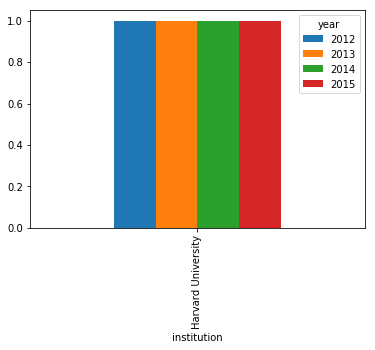

In [317]:
pv_same_all = pv_dta[(pv_dta[2012]==pv_dta[2013])&(pv_dta[2013]==pv_dta[2014])&(pv_dta[2014]==pv_dta[2015])]
#print(pv_same_all)
same_inst = list(pv_same_all.index)
same_df = pv_same_all.reset_index()
same_df = same_df.set_index('institution')
print(same_df)
same_df.plot.bar()

year                                             2012  2013  2014  2015
institution                                                            
Brown University                                 66.0  77.0  81.0  83.0
Carnegie Mellon University                       43.0  51.0  54.0  61.0
Osaka University                                 32.0  35.0  43.0  45.0
University of California, Irvine                 47.0  65.0  80.0  89.0
University of Rochester                          53.0  76.0  77.0  81.0
University of Texas Southwestern Medical Center  29.0  46.0  66.0  75.0
University of Utah                               38.0  42.0  62.0  70.0
Weizmann Institute of Science                    18.0  33.0  38.0  39.0


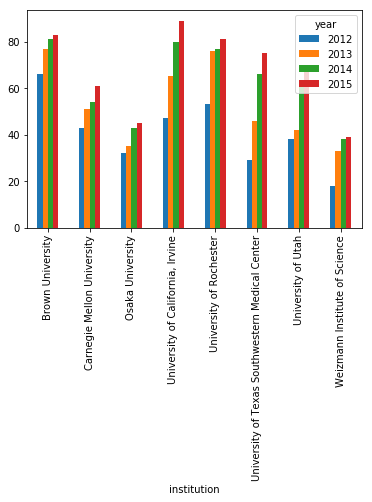

In [318]:
pv_falling_all = pv_dta[(pv_dta[2012]<pv_dta[2013])&(pv_dta[2013]<pv_dta[2014])&(pv_dta[2014]<pv_dta[2015])]
#print(pv_falling_all)
falling_inst = list(pv_falling_all.index)
new_df = pv_dta.reset_index()
falling_df = pv_falling_all.reset_index()
falling_df = falling_df.set_index('institution')
print(falling_df)
falling_df.plot.bar()

year                                          2012  2013  2014  2015
institution                                                         
Northwestern University                       33.0  28.0  23.0  22.0
University of Manchester                      76.0  72.0  69.0  67.0
University of Michigan, Ann Arbor             34.0  32.0  21.0  19.0
University of Pittsburgh - Pittsburgh Campus  71.0  69.0  53.0  46.0


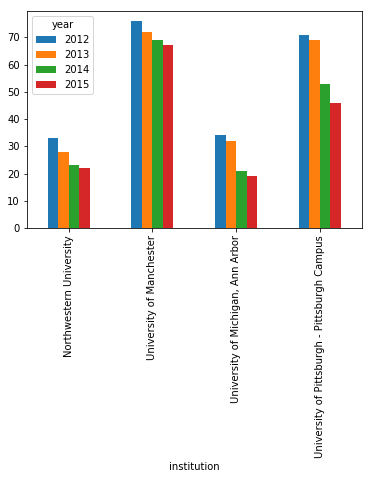

In [319]:
pv_rising_all = pv_dta[(pv_dta[2012]>pv_dta[2013])&(pv_dta[2013]>pv_dta[2014])&(pv_dta[2014]>pv_dta[2015])]
#print(pv_rising_all)
rising_inst = list(pv_rising_all.index)
rising_df = pv_rising_all.reset_index()
rising_df = rising_df.set_index('institution')
print(rising_df)
rising_df.plot.bar()

In [380]:
always_ranked

year,2012,2013,2014,2015
institution,,,,
Boston University,62.0,54.0,67.0,66.0
Brown University,66.0,77.0,81.0,83.0
California Institute of Technology,5.0,11.0,12.0,12.0
Carnegie Mellon University,43.0,51.0,54.0,61.0
Columbia University,9.0,6.0,6.0,6.0
Cornell University,12.0,13.0,11.0,10.0
Dartmouth College,58.0,82.0,44.0,44.0
Duke University,27.0,25.0,26.0,28.0
Emory University,81.0,93.0,78.0,84.0


Harvard is the only school that has been consistent over the four years, and they have been ranked in first place. The schools that have consistently fallen in the ranks every year are Brown University, Carnegie Mellon University, Osaka University, University of California, Irvine, University of Rochester, University of Texas Southwestern Medical Center, University of Utah, and Weizmann Institute of Science. The schools that have consistently risen in the ranks every year are Northwestern University, University of Manchester, University of Pittsburgh - Pittsburgh Campus and University of Michigan, Ann Arbor <font color=blue>Go Blue!</font> There are graphs above representing schools that have been ranked the same, those that have consistently fallen, and those that have consistently risen in the ranks. 82 of the top 100 schools were ranked all four years and are in the table above. 

### For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

In [394]:
educ_exp_data = pd.read_csv("education_expenditure_supplementary_data.csv", lineterminator='\n')
educ_exp_data.head(1)
educ_exp_data['institute_type'] = educ_exp_data['institute_type'].apply(lambda x: x.strip())
educ_exp_data['direct_expenditure_type'] = educ_exp_data['direct_expenditure_type'].apply(lambda x: x.strip())
educ_exp_data = educ_exp_data.rename(columns={'1995': 'avg_1995', '2000': 'avg_2000', '2005': 'avg_2005',
                                                  '2009': 'avg_2009', '2010': 'avg_2010', '2011': 'avg_2011'})
educ_exp_data.head()

,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


In [395]:
educ_exp_higher = educ_exp_data[(educ_exp_data.institute_type=="Higher Education Institutions") & 
                                    (educ_exp_data.direct_expenditure_type=="Public")]
educ_exp_higher.head()

,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011
74,OECD Average,Higher Education Institutions,Public,0.9,1.0,1.0,1.1,1.1,1.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7
76,Austria,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.5,1.4
77,Belgium,Higher Education Institutions,Public,0.9,1.2,1.2,1.4,1.4,1.3
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN


In [203]:
educ_exp_higher.describe()

,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011
count,31.000000,33.000000,35.000000,34.000000,33.000000,33.000000
mean,0.932258,0.972727,1.008571,1.105882,1.121212,1.100000
std,0.354389,0.301323,0.310949,0.341956,0.337044,0.321131
min,0.100000,0.500000,0.300000,0.300000,0.500000,0.500000
25%,0.750000,0.800000,0.850000,1.000000,0.900000,0.900000
50%,0.900000,0.900000,1.000000,1.100000,1.000000,1.000000
75%,1.100000,1.200000,1.200000,1.300000,1.300000,1.300000
max,1.700000,1.700000,1.700000,1.800000,1.900000,1.900000


In [204]:
educ_table = educ_exp_higher[(educ_exp_higher.avg_2000<.972727) & (educ_exp_higher.avg_2010>1.121212)]
educ_table

,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011


In [330]:
educ_exp_higher['difference'] = educ_exp_higher.avg_2010 - educ_exp_higher.avg_2000
educ_exp_higher.sort_values('difference')

/Users/AmyAustin/anaconda3/envs/si618v/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,institute_type,direct_expenditure_type,avg_1995,avg_2000,avg_2005,avg_2009,avg_2010,avg_2011,difference
90,Israel,Higher Education Institutions,Public,NaN,1.1,1.0,1.0,1.0,0.9,-0.1
87,Hungary,Higher Education Institutions,Public,0.8,0.9,0.9,1.0,0.8,1.0,-0.1
75,Australia,Higher Education Institutions,Public,1.2,0.8,0.8,0.7,0.8,0.7,0.0
107,United Kingdom,Higher Education Institutions,Public,0.7,0.7,0.9,0.6,0.7,0.9,0.0
78,Canada,Higher Education Institutions,Public,1.5,1.6,1.5,1.5,1.6,NaN,0.0
101,Slovak Republic,Higher Education Institutions,Public,NaN,0.7,0.7,0.7,0.7,0.8,0.0
100,Portugal,Higher Education Institutions,Public,1.0,1.0,0.9,1.0,1.0,1.0,0.0
92,Japan,Higher Education Institutions,Public,0.4,0.5,0.5,0.5,0.5,0.5,0.0
97,New Zealand,Higher Education Institutions,Public,1.1,0.9,0.9,1.1,1.0,1.0,0.1
93,"Korea, Republic of",Higher Education Institutions,Public,0.3,0.6,0.6,0.7,0.7,0.7,0.1


In [322]:
to_ml_pl = educ_exp_higher['difference']

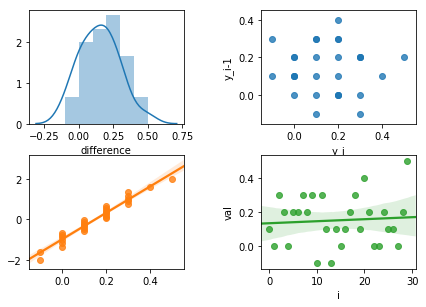

In [323]:
multiplePlots(educ_exp_higher['difference'].dropna())

The education expenditure dataset only had data for public universities, so this analysis doesn't include information on private universities. Based on data on public universities, no nations spent below the average of the OECD for Higher Education Institutions in 2000 and above the average in 2010.

Israel and Hungary are the only countries that spent less in 2010 than they did in 2000. The Russian Federation had the greatest difference, spending 0.5 GDP more.

The difference between spending in 2010 and 2000 appears to be normally distributed and the randomness assumption does not hold. 

### For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

In [162]:
times_2011_ratio = times_data[(times_data.year==2011)]
times_2016_ratio = times_data[(times_data.year==2016)]

(Use this space to explain your answers)

count    178.000000
mean       1.046067
std        0.362298
min        0.150000
25%        0.890000
50%        1.080000
75%        1.220000
max        2.330000
Name: new_female_male_ratio, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


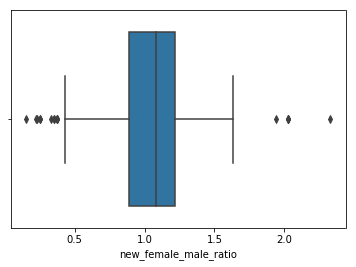

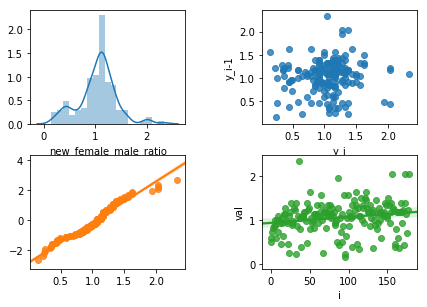

In [163]:
print(times_2011_ratio['new_female_male_ratio'].describe())
print(sns.boxplot(x=times_2011_ratio['new_female_male_ratio']))
multiplePlots(times_2011_ratio['new_female_male_ratio'].dropna())

count    735.000000
mean       1.081932
std        0.472042
min        0.010000
25%        0.820000
50%        1.080000
75%        1.330000
max        3.550000
Name: new_female_male_ratio, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


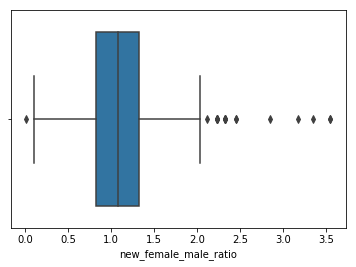

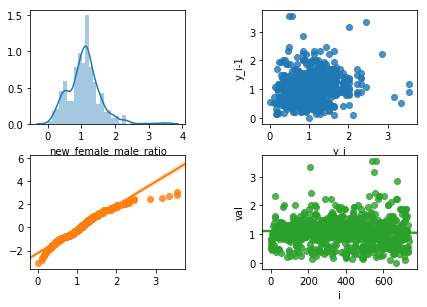

In [164]:
print(times_2016_ratio['new_female_male_ratio'].describe())
print(sns.boxplot(x=times_2016_ratio['new_female_male_ratio']))
multiplePlots(times_2016_ratio['new_female_male_ratio'].dropna())

In 2011, the mean ratio of females to males was 1.05, meaning that on average the schools had about the same number of male and female students, with the number of females being slightly higher. The range was 0.15 to 2.33 and the ratios were normally distributed with outliers in both directions. 

In 2016, the mean ratio of females to males was 1.08, which was higher than the average ratio from 2011 by 0.03. The range was 0.01 to 3.55, which was wider than the range in 2016, with both the minimum ratio being lower as well as the maximum ratio being higher. The ratios had a distribution skewed to the right with many outliers in the higher range. 

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [239]:
#1 - UCLA, 2 - UM Ann Arbor, 3 - Berkley, 4 - UNC, 5 - UC Davis
cwur_pivot = cwur_data.pivot(index='institution', columns='year', values='national_rank')

#Berkeley Rank
print(cwur_pivot.loc["University of California, Berkeley"])
#UCLA rank
print(cwur_pivot.loc["University of California, Los Angeles"])
#UM rank
print(cwur_pivot.loc["University of Michigan, Ann Arbor"])
#UNC
print(cwur_pivot.loc["University of North Carolina at Chapel Hill"])
#Davis
print(cwur_pivot.loc["University of California, Davis"])

year
2012    8.0
2013    5.0
2014    5.0
2015    5.0
Name: University of California, Berkeley, dtype: float64
year
2012    13.0
2013    12.0
2014    12.0
2015    12.0
Name: University of California, Los Angeles, dtype: float64
year
2012    24.0
2013    23.0
2014    16.0
2015    15.0
Name: University of Michigan, Ann Arbor, dtype: float64
year
2012    25.0
2013    24.0
2014    28.0
2015    25.0
Name: University of North Carolina at Chapel Hill, dtype: float64
year
2012    33.0
2013    37.0
2014    36.0
2015    36.0
Name: University of California, Davis, dtype: float64


In [343]:
times_pivot = shanghai_data.pivot_table(index='university_name', columns='year', values='national_rank')

#Berkeley Rank
print(shanghai_pivot.loc["University of California, Berkeley"])
#UCLA rank
print(shanghai_pivot.loc["University of California, Los Angeles"])
#UM rank
print(shanghai_pivot.loc["University of Michigan"])
#UNC
print(shanghai_pivot.loc["University of North Carolina at Chapel Hill"])
#Davis
print(shanghai_pivot.loc["University of California, Davis"])

year
2005    3.0
2006    3.0
2007    3.0
2008    3.0
2009    3.0
2010    2.0
2011    4.0
2012    4.0
2013    3.0
2014    NaN
2015    4.0
Name: University of California, Berkeley, dtype: float64
year
2005    12.0
2006    12.0
2007    11.0
2008    11.0
2009    11.0
2010    11.0
2011    10.0
2012    10.0
2013    10.0
2014    10.0
2015    10.0
Name: University of California, Los Angeles, dtype: float64
year
2005    18.0
2006    18.0
2007    18.0
2008    18.0
2009    18.0
2010    18.0
2011    18.0
2012    18.0
2013    18.0
2014     NaN
2015     NaN
Name: University of Michigan - Ann Arbor, dtype: float64
year
2005    39.0
2006    40.0
2007    39.0
2008    29.0
2009    30.0
2010    30.0
2011    30.0
2012    30.0
2013    30.0
2014    27.0
2015    29.0
Name: University of North Carolina at Chapel Hill, dtype: float64
year
2005    32.0
2006    32.0
2007    32.0
2008    35.0
2009    36.0
2010    32.0
2011    33.0
2012    33.0
2013    33.0
2014    36.0
2015    35.0
Name: University of California,

In [393]:
us_dta = times_data[(times_data.country=="United States of America")]
us_dta
us_dta.insert(0, 'national_rank', range(1, 1 + len(us_dta)))

In [392]:
times_pivot = us_dta.pivot(index='university_name', columns='year', values='national_rank')

#Berkeley Rank
print(times_pivot.loc["University of California, Berkeley"].head(1))
#UCLA rank
print(times_pivot.loc["University of California, Los Angeles"].head(1))
#UM rank
print(times_pivot.loc["University of Michigan"].head(1))
#UNC
print(times_pivot.loc["University of North Carolina at Chapel Hill"].head(1))
#Davis
print(times_pivot.loc["University of California, Davis"].head(1))

year
2011    6.0
Name: University of California, Berkeley, dtype: float64
year
2011    8.0
Name: University of California, Los Angeles, dtype: float64
year
2011    12.0
Name: University of Michigan, dtype: float64
year
2011    21.0
Name: University of North Carolina at Chapel Hill, dtype: float64
year
2011    31.0
Name: University of California, Davis, dtype: float64


Overall, it was difficult to assess this question because there was not any information about whether or not a university was public or private in the datasets. None of the datasets were similar to the rankings in the article based on the national rank, and they all consistently ranked UC Berkeley above both UCLA and UM-Ann Arbor. If I had to pick any of the datasets that was the most similar it would be the Times ranking, which ranked all 5 universities the highest overall. 